In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
#The point of this is to fit a RNN to the dataset to generate the next close price of the dataset
data = pd.read_csv('Tot_dep_2017_Aug_mult.csv')
data.head()

,CYCLE_DT,DDA,TOT,MMDA,SAV,IRA,CD
0,201201,621848,2047542,849766,153982,85277,336670
1,201202,629182,2064871,859274,158249,84967,333199
2,201203,654617,2105241,872873,165765,84300,327686
3,201204,666697,2113492,874853,168101,84130,319710
4,201205,644868,2088118,875964,168762,83786,314738


In [4]:
cl = data.DDA
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

C:\Users\dbing\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\Users\dbing\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.        ],
       [ 0.01793448],
       [ 0.08013293],
       [ 0.10967322],
       [ 0.05629284],
       [ 0.05814889],
       [ 0.05236066],
       [ 0.05904635],
       [ 0.07759706],
       [ 0.06954685],
       [ 0.09610376],
       [ 0.1579941 ],
       [ 0.19127583],
       [ 0.18182441],
       [ 0.24772762],
       [ 0.28321754],
       [ 0.21967657],
       [ 0.22461137],
       [ 0.21100034],
       [ 0.21851501],
       [ 0.2267682 ],
       [ 0.22198991],
       [ 0.24568817],
       [ 0.27773498],
       [ 0.30261436],
       [ 0.31172588],
       [ 0.38148792],
       [ 0.42072418],
       [ 0.35811245],
       [ 0.35973375],
       [ 0.35458865],
       [ 0.36603307],
       [ 0.36713105],
       [ 0.36517229],
       [ 0.38435147],
       [ 0.41205528],
       [ 0.45225257],
       [ 0.47612201],
       [ 0.54237736],
       [ 0.59582866],
       [ 0.52908667],
       [ 0.52948527],
       [ 0.52701298],
       [ 0.53521971],
       [ 0.54488877],
       [ 0

In [26]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,1)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

53
14
53
14


In [27]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(1,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),shuffle=False)

Train on 53 samples, validate on 14 samples
Epoch 1/1000
53/53 [==============================] - 1s - loss: 0.1656 - val_loss: 0.7037
Epoch 2/1000
53/53 [==============================] - 0s - loss: 0.1538 - val_loss: 0.6684
Epoch 3/1000
53/53 [==============================] - 0s - loss: 0.1428 - val_loss: 0.6338
Epoch 4/1000
53/53 [==============================] - 0s - loss: 0.1323 - val_loss: 0.6000
Epoch 5/1000
53/53 [==============================] - 0s - loss: 0.1222 - val_loss: 0.5670
Epoch 6/1000
53/53 [==============================] - 0s - loss: 0.1125 - val_loss: 0.5348
Epoch 7/1000
53/53 [==============================] - 0s - loss: 0.1033 - val_loss: 0.5034
Epoch 8/1000
53/53 [==============================] - 0s - loss: 0.0945 - val_loss: 0.4727
Epoch 9/1000
53/53 [==============================] - 0s - loss: 0.0861 - val_loss: 0.4429
Epoch 10/1000
53/53 [==============================] - 0s - loss: 0.0782 - val_loss: 0.4138
Epoch 11/1000
53/53 [========================

53/53 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0292
Epoch 90/1000
53/53 [==============================] - 0s - loss: 0.0089 - val_loss: 0.0285
Epoch 91/1000
53/53 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0278
Epoch 92/1000
53/53 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0271
Epoch 93/1000
53/53 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0265
Epoch 94/1000
53/53 [==============================] - 0s - loss: 0.0083 - val_loss: 0.0258
Epoch 95/1000
53/53 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0251
Epoch 96/1000
53/53 [==============================] - 0s - loss: 0.0079 - val_loss: 0.0245
Epoch 97/1000
53/53 [==============================] - 0s - loss: 0.0078 - val_loss: 0.0239
Epoch 98/1000
53/53 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0232
Epoch 99/1000
53/53 [==============================] - 0s - loss: 0.0075 - val_loss: 0.0226
Ep

53/53 [==============================] - 0s - loss: 0.0015 - val_loss: 0.0017
Epoch 178/1000
53/53 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0017
Epoch 179/1000
53/53 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0016
Epoch 180/1000
53/53 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0016
Epoch 181/1000
53/53 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0016
Epoch 182/1000
53/53 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0016
Epoch 183/1000
53/53 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0015
Epoch 184/1000
53/53 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0015
Epoch 185/1000
53/53 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 186/1000
53/53 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 187/1000
53/53 [==============================] - 0s - loss: 0.0013 - val_loss:

53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 266/1000
53/53 [==============================] - ETA: 0s - loss: 0.001 - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 267/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 268/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 269/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 270/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 271/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 272/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 273/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 274/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 275/1000
53/53 [==============================] - 0s - 

53/53 [==============================] - ETA: 0s - loss: 0.001 - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 353/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 354/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 355/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 356/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 357/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 358/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 359/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 360/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 361/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 362/1000
53/53 [==============================] - 0s - 

53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 440/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 441/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 442/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 443/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 444/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 445/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 446/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 447/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 448/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 449/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss:

53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 528/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 529/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 530/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 531/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 532/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 533/1000
53/53 [==============================] - ETA: 0s - loss: 0.001 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 534/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 535/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 536/1000
53/53 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 537/1000
53/53 [==============================] - 0s - 

Epoch 615/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 616/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 617/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 618/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 619/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 620/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 621/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 622/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 623/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 624/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 625/1000
53/53 [==============================] - 0s - loss: 0.0

53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 704/1000
53/53 [==============================] - ETA: 0s - loss: 0.001 - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 705/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 706/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 707/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 708/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 709/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 710/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 711/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 712/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 713/1000
53/53 [==============================] - 0s - 

53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 792/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 793/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 794/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 795/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 796/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 797/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 798/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 799/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 800/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0015
Epoch 801/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss:

53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 879/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 880/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 881/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 882/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 883/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 884/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 885/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 886/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 887/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 888/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss:

53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 966/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 967/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 968/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 969/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 970/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 971/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 972/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 973/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 974/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 975/1000
53/53 [==============================] - 0s - loss: 0.0011 - val_loss:

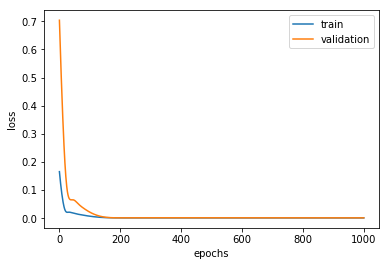

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

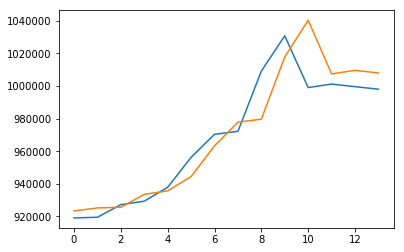

In [29]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.show()

In [30]:
act = []
pred = []
for i in range(12):
    Xt = model.predict(X_test[i].reshape(1,1,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))


predicted:[[ 923356.5625]], actual:[[ 919101.]]
predicted:[[ 925227.8125]], actual:[[ 919504.]]
predicted:[[ 925639.25]], actual:[[ 927240.]]
predicted:[[ 933543.9375]], actual:[[ 929353.]]
predicted:[[ 935704.875]], actual:[[ 937903.]]
predicted:[[ 944456.6875]], actual:[[ 956250.]]
predicted:[[ 963279.6875]], actual:[[ 970371.]]
predicted:[[ 977806.125]], actual:[[ 972170.]]
predicted:[[ 979659.125]], actual:[[ 1009137.]]
predicted:[[ 1017853.6875]], actual:[[ 1030781.]]
predicted:[[ 1040316.8125]], actual:[[ 999030.]]
predicted:[[ 1007389.1875]], actual:[[ 1001178.]]


In [51]:
#Lets try with a stacked LSTM just for fun
#Build the model

from keras.layers import LSTM, Dropout

model = Sequential()
model.add(LSTM(10,return_sequences=True,input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(LSTM(10,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),shuffle=False)

Train on 53 samples, validate on 14 samples
Epoch 1/1000
53/53 [==============================] - 5s - loss: 0.1676 - val_loss: 0.7290
Epoch 2/1000
53/53 [==============================] - 0s - loss: 0.1646 - val_loss: 0.7219
Epoch 3/1000
53/53 [==============================] - 0s - loss: 0.1620 - val_loss: 0.7148
Epoch 4/1000
53/53 [==============================] - 0s - loss: 0.1595 - val_loss: 0.7078
Epoch 5/1000
53/53 [==============================] - 0s - loss: 0.1566 - val_loss: 0.7007
Epoch 6/1000
53/53 [==============================] - 0s - loss: 0.1544 - val_loss: 0.6936
Epoch 7/1000
53/53 [==============================] - 0s - loss: 0.1515 - val_loss: 0.6865
Epoch 8/1000
53/53 [==============================] - 0s - loss: 0.1490 - val_loss: 0.6794
Epoch 9/1000
53/53 [==============================] - 0s - loss: 0.1458 - val_loss: 0.6723
Epoch 10/1000
53/53 [==============================] - 0s - loss: 0.1432 - val_loss: 0.6652
Epoch 11/1000
53/53 [========================

53/53 [==============================] - 0s - loss: 0.0324 - val_loss: 0.1497
Epoch 90/1000
53/53 [==============================] - 0s - loss: 0.0342 - val_loss: 0.1484
Epoch 91/1000
53/53 [==============================] - 0s - loss: 0.0363 - val_loss: 0.1471
Epoch 92/1000
53/53 [==============================] - 0s - loss: 0.0353 - val_loss: 0.1460
Epoch 93/1000
53/53 [==============================] - 0s - loss: 0.0356 - val_loss: 0.1451
Epoch 94/1000
53/53 [==============================] - 0s - loss: 0.0413 - val_loss: 0.1444
Epoch 95/1000
53/53 [==============================] - 0s - loss: 0.0340 - val_loss: 0.1434
Epoch 96/1000
53/53 [==============================] - 0s - loss: 0.0328 - val_loss: 0.1424
Epoch 97/1000
53/53 [==============================] - 0s - loss: 0.0340 - val_loss: 0.1414
Epoch 98/1000
53/53 [==============================] - 0s - loss: 0.0300 - val_loss: 0.1406
Epoch 99/1000
53/53 [==============================] - 0s - loss: 0.0309 - val_loss: 0.1397
Ep

53/53 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0798
Epoch 177/1000
53/53 [==============================] - 0s - loss: 0.0228 - val_loss: 0.0790
Epoch 178/1000
53/53 [==============================] - 0s - loss: 0.0242 - val_loss: 0.0783
Epoch 179/1000
53/53 [==============================] - 0s - loss: 0.0243 - val_loss: 0.0779
Epoch 180/1000
53/53 [==============================] - 0s - loss: 0.0243 - val_loss: 0.0772
Epoch 181/1000
53/53 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0767
Epoch 182/1000
53/53 [==============================] - 0s - loss: 0.0233 - val_loss: 0.0762
Epoch 183/1000
53/53 [==============================] - 0s - loss: 0.0243 - val_loss: 0.0755
Epoch 184/1000
53/53 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0745
Epoch 185/1000
53/53 [==============================] - 0s - loss: 0.0248 - val_loss: 0.0735
Epoch 186/1000
53/53 [==============================] - 0s - loss: 0.0193 - val_loss:

53/53 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0183
Epoch 264/1000
53/53 [==============================] - 0s - loss: 0.0101 - val_loss: 0.0179
Epoch 265/1000
53/53 [==============================] - 0s - loss: 0.0125 - val_loss: 0.0175
Epoch 266/1000
53/53 [==============================] - 0s - loss: 0.0105 - val_loss: 0.0171
Epoch 267/1000
53/53 [==============================] - 0s - loss: 0.0103 - val_loss: 0.0170
Epoch 268/1000
53/53 [==============================] - 0s - loss: 0.0119 - val_loss: 0.0171
Epoch 269/1000
53/53 [==============================] - 0s - loss: 0.0148 - val_loss: 0.0171
Epoch 270/1000
53/53 [==============================] - 0s - loss: 0.0102 - val_loss: 0.0170
Epoch 271/1000
53/53 [==============================] - 0s - loss: 0.0102 - val_loss: 0.0168
Epoch 272/1000
53/53 [==============================] - 0s - loss: 0.0130 - val_loss: 0.0165
Epoch 273/1000
53/53 [==============================] - 0s - loss: 0.0129 - val_loss:

53/53 [==============================] - 0s - loss: 0.0085 - val_loss: 0.0023
Epoch 351/1000
53/53 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0022
Epoch 352/1000
53/53 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0022
Epoch 353/1000
53/53 [==============================] - 0s - loss: 0.0096 - val_loss: 0.0021
Epoch 354/1000
53/53 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0021
Epoch 355/1000
53/53 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0021
Epoch 356/1000
53/53 [==============================] - ETA: 0s - loss: 0.003 - 0s - loss: 0.0061 - val_loss: 0.0022
Epoch 357/1000
53/53 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0023
Epoch 358/1000
53/53 [==============================] - 0s - loss: 0.0064 - val_loss: 0.0025
Epoch 359/1000
53/53 [==============================] - 0s - loss: 0.0077 - val_loss: 0.0027
Epoch 360/1000
53/53 [==============================] - 0s - 

53/53 [==============================] - 0s - loss: 0.0080 - val_loss: 0.0018
Epoch 438/1000
53/53 [==============================] - 0s - loss: 0.0069 - val_loss: 0.0018
Epoch 439/1000
53/53 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0018
Epoch 440/1000
53/53 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0018
Epoch 441/1000
53/53 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0018
Epoch 442/1000
53/53 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0018
Epoch 443/1000
53/53 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0018
Epoch 444/1000
53/53 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0018
Epoch 445/1000
53/53 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0018
Epoch 446/1000
53/53 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0019
Epoch 447/1000
53/53 [==============================] - 0s - loss: 0.0042 - val_loss:

53/53 [==============================] - 0s - loss: 0.0062 - val_loss: 0.0020
Epoch 526/1000
53/53 [==============================] - 0s - loss: 0.0068 - val_loss: 0.0021
Epoch 527/1000
53/53 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0021
Epoch 528/1000
53/53 [==============================] - 0s - loss: 0.0080 - val_loss: 0.0021
Epoch 529/1000
53/53 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0020
Epoch 530/1000
53/53 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0019
Epoch 531/1000
53/53 [==============================] - 0s - loss: 0.0072 - val_loss: 0.0018
Epoch 532/1000
53/53 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0018
Epoch 533/1000
53/53 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0018
Epoch 534/1000
53/53 [==============================] - 0s - loss: 0.0061 - val_loss: 0.0018
Epoch 535/1000
53/53 [==============================] - 0s - loss: 0.0083 - val_loss:

53/53 [==============================] - 0s - loss: 0.0071 - val_loss: 0.0019
Epoch 614/1000
53/53 [==============================] - 0s - loss: 0.0077 - val_loss: 0.0020
Epoch 615/1000
53/53 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0021
Epoch 616/1000
53/53 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0022
Epoch 617/1000
53/53 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0022
Epoch 618/1000
53/53 [==============================] - 0s - loss: 0.0065 - val_loss: 0.0022
Epoch 619/1000
53/53 [==============================] - 0s - loss: 0.0064 - val_loss: 0.0021
Epoch 620/1000
53/53 [==============================] - 0s - loss: 0.0078 - val_loss: 0.0020
Epoch 621/1000
53/53 [==============================] - 0s - loss: 0.0038 - val_loss: 0.0020
Epoch 622/1000
53/53 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0019
Epoch 623/1000
53/53 [==============================] - 0s - loss: 0.0069 - val_loss:

53/53 [==============================] - 0s - loss: 0.0059 - val_loss: 0.0016
Epoch 702/1000
53/53 [==============================] - 0s - loss: 0.0034 - val_loss: 0.0017
Epoch 703/1000
53/53 [==============================] - 0s - loss: 0.0073 - val_loss: 0.0017
Epoch 704/1000
53/53 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0017
Epoch 705/1000
53/53 [==============================] - 0s - loss: 0.0059 - val_loss: 0.0018
Epoch 706/1000
53/53 [==============================] - 0s - loss: 0.0052 - val_loss: 0.0018
Epoch 707/1000
53/53 [==============================] - 0s - loss: 0.0061 - val_loss: 0.0018
Epoch 708/1000
53/53 [==============================] - 0s - loss: 0.0031 - val_loss: 0.0018
Epoch 709/1000
53/53 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0018
Epoch 710/1000
53/53 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0018
Epoch 711/1000
53/53 [==============================] - 0s - loss: 0.0077 - val_loss:

53/53 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0017
Epoch 790/1000
53/53 [==============================] - 0s - loss: 0.0031 - val_loss: 0.0017
Epoch 791/1000
53/53 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0017
Epoch 792/1000
53/53 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0016
Epoch 793/1000
53/53 [==============================] - 0s - loss: 0.0037 - val_loss: 0.0015
Epoch 794/1000
53/53 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0015
Epoch 795/1000
53/53 [==============================] - 0s - loss: 0.0066 - val_loss: 0.0014
Epoch 796/1000
53/53 [==============================] - 0s - loss: 0.0073 - val_loss: 0.0014
Epoch 797/1000
53/53 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0014
Epoch 798/1000
53/53 [==============================] - 0s - loss: 0.0037 - val_loss: 0.0015
Epoch 799/1000
53/53 [==============================] - 0s - loss: 0.0075 - val_loss:

53/53 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0014
Epoch 878/1000
53/53 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0015
Epoch 879/1000
53/53 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0015
Epoch 880/1000
53/53 [==============================] - 0s - loss: 0.0071 - val_loss: 0.0015
Epoch 881/1000
53/53 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0015
Epoch 882/1000
53/53 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0015
Epoch 883/1000
53/53 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0015
Epoch 884/1000
53/53 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0015
Epoch 885/1000
53/53 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0015
Epoch 886/1000
53/53 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0014
Epoch 887/1000
53/53 [==============================] - 0s - loss: 0.0052 - val_loss:

53/53 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0017
Epoch 966/1000
53/53 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0016
Epoch 967/1000
53/53 [==============================] - 0s - loss: 0.0037 - val_loss: 0.0016
Epoch 968/1000
53/53 [==============================] - 0s - loss: 0.0041 - val_loss: 0.0016
Epoch 969/1000
53/53 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0016
Epoch 970/1000
53/53 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0015
Epoch 971/1000
53/53 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0015
Epoch 972/1000
53/53 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0015
Epoch 973/1000
53/53 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0015
Epoch 974/1000
53/53 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0014
Epoch 975/1000
53/53 [==============================] - 0s - loss: 0.0042 - val_loss:

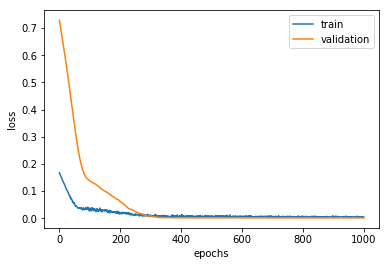

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

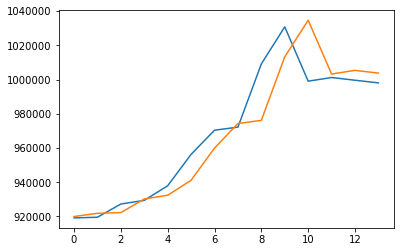

In [53]:
#Much cleaner loss this time, still could use some more data. Ideally should run multiple to get
#the average loss/val loss plots. Next time would probably stop at 100 epochs
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.show()